<a href="https://colab.research.google.com/github/giorgisi/giorgis-NEUR265/blob/main/homework/coding_homework_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding Homework #6

**Instructions**

1. Make a *Markdown Cell* that contains the following information:
- Your name (small header)
- The name of this class (italicized)
- The date (bolded)

2. Create a *Code Cell* that imports relevant modules - specifically, <code>numpy as np</code>, and <code>matplotlib.pyplot as plt</code>.

3. For this assignment, you will be working with the <code>acc_hits_hw6.csv</code>, <code>acc_fa_hw6.csv</code>, <code>lc_hits_hw6.csv</code>, and <code>lc_fa_hw6.csv</code> files in our shared Google Drive folder. Create a *Code Cell* that imports these files as <code>numpy</code> arrays called <code>acc_hits</code>, <code>acc_fa</code>, <code>lc_hits</code>, and <code>lc_fa</code>, respectively. To do this, you should upload each file to your personal GitHub repo.

4. Create a *Code Cell* that prints the <code>shape</code> of each array.

5. Both your <code>acc_hits</code> and <code>acc_fa</code> arrays consist of LFP data recorded from the mouse anterior cingulate cortex, and both your <code>lc_hits</code> and <code>lc_fa</code> arrays consist of LFP data simultaneously recorded from the mouse locus coeruleus (an area in the brainstem with neurons that produce the neurotransmitter norepinephrine). Rows of these arrays correspond to separate trials, and columns correspond to samples (timepoints). Similarly to last week, the task that the mouse was performing is called the **continuous performance test**. This test measures sustained attention. Specifically, the mouse is shaped to respond to a stimulus on a touchscreen. The mouse is rewarded (receives some strawberry milkshake) when it responds to one type of stimulus. This stimulus is called the S+ (it usually looks like horizontal or vertical black and white bars). When the mouse responds to this stimulus, we call that response a **hit**. Your <code>acc_hits</code> and <code>lc_hits</code> variables contain LFP surrounding these hits. In contrast, when the mouse is presented with another stimulus (the S-, which usually looks like a snowflake), it is not supposed to respond. When it does respond, we call that a **false alarm**. Your <code>acc_fa</code> and <code>lc_fa</code> variables contain LFP surrounding these false alarms. So, you have four arrays - two arrays with LFP recorded during correct choices (hits), and two arrays with LFP recorded during incorrect choices (false alarms).

6. In a new *Code Cell*, create variable called <code>time</code> that has the same length as your four arrays, with equally spaced values between "zero" and "four" (the length of each trial, in seconds).

7. In a new *Code Cell*, create an expression to determine the sampling rate of the data using the knowledge that you have 8001 samples, and the total length of each sample is 4 seconds.

8. In a new *Code Cell*, plot the first trial of <code>acc_hits</code> in <font color = 'red'>red</font>, and the first trial of <code>lc_hits</code> in the same plot in <font color = 'blue'>blue</font> in one subplot. In a second subplot, plot the first trial of <code>acc_fa</code> in <font color = 'red'>red</font>, and the first trial of <code>lc_fa</code> in <font color = 'blue'>blue</font>. Put time on the x-axis of both of your subplots. Label the axes of your subplots.

9. In a new *Markdown Cell*, describe what you think the dominant oscillation in the ACC LFP might be, and what the dominant oscillation in the locus coeruleus (LC) LFP might be. Are the two different? By visual inspection, do you notice any relationship between the two brain areas during the "hit" you plotted, or the "false alarm" you plotted? Recall from our notebook on phase coherence that sometimes the peaks and troughs of two oscillations have a consistent relationship across time. Is there any evidence of this in the raw LFP?

10. In a new *Code Cell*, compute the coherence for <code>acc_hits</code> and <code>lc_hits</code>. Make sure to follow the steps in the "Computing the Coherence" section of our notebook from last week. The end result should be a plot with "Frequency (Hz)" on the x-axis, and "Coherence" on the y-axis. Label your axes.

11. In a new *Markdown Cell*, describe your results. In which frequency band is there the most phase coherence during hits?

12. In a new *Code Cell*, repeat step 10, but with <code>acc_fa</code> and <code>lc_fa</code>. Plot the results from step 10 in <font color = 'red'>red</font>, and the results from this step in <font color = 'blue'>blue</font>, in the same plot (in other words, you should have one plot, with two different lines on it - one will be the coherence for "hits" that you calculated in step 10, and one will be the coherence for "false alarms"). Label your axes.

13. In a new *Markdown Cell*, intepret your plot from step 12. Is the frequency at which coherence is strongest different between hits and false alarms? Is coherence higher/lower during hits vs. false alarms? If higher coherence means more communication between the ACC and LC, are these two brain areas talking to each more or less during hits vs. false alarms?

14. Make sure to put a <code>#</code> in each *Code Cell* to describe what it does.

15. Save a copy of this notebook to your GitHub repo with the title <code>coding_homework_6.ipynb</code>.





##Isabelle Giorgis
*NEUR 265: Neual Data Analysis*

**29 March 2024**


In [2]:
#Imports relevant packages

import numpy as np
import matplotlib.pyplot as plt


In [3]:
#Import csv Files

acc_hits_url = 'https://raw.githubusercontent.com/giorgisi/giorgis-NEUR265/main/acc_hits_hw6.csv'
acc_fa_url = 'https://raw.githubusercontent.com/giorgisi/giorgis-NEUR265/main/acc_fa_hw6.csv'
lc_hits_url = 'https://raw.githubusercontent.com/giorgisi/giorgis-NEUR265/main/lc_hits_hw6.csv'
lc_fa_url = 'https://raw.githubusercontent.com/giorgisi/giorgis-NEUR265/main/lc_fa_hw6.csv'

acc_hits = np.loadtxt(acc_hits_url, delimiter = ',')
acc_fa = np.loadtxt(acc_fa_url, delimiter = ',')
lc_hits = np.loadtxt(lc_hits_url, delimiter =',')
lc_fa = np.loadtxt(lc_fa_url, delimiter=',')

In [4]:
#Print shape of each array

print(np.shape(acc_hits))
print(np.shape(acc_fa))
print(np.shape(lc_hits))
print(np.shape(lc_fa))

(14, 8001)
(19, 8001)
(14, 8001)
(19, 8001)


In [5]:
#Create time variable

time = np.linspace(0,4,8001)

In [8]:
#Calculate Sample Rate

sample_rate = 8001/4
print(sample_rate, 'Hz')

2000.25 Hz


Text(0, 0.5, 'Voltage [\\$muV$]')

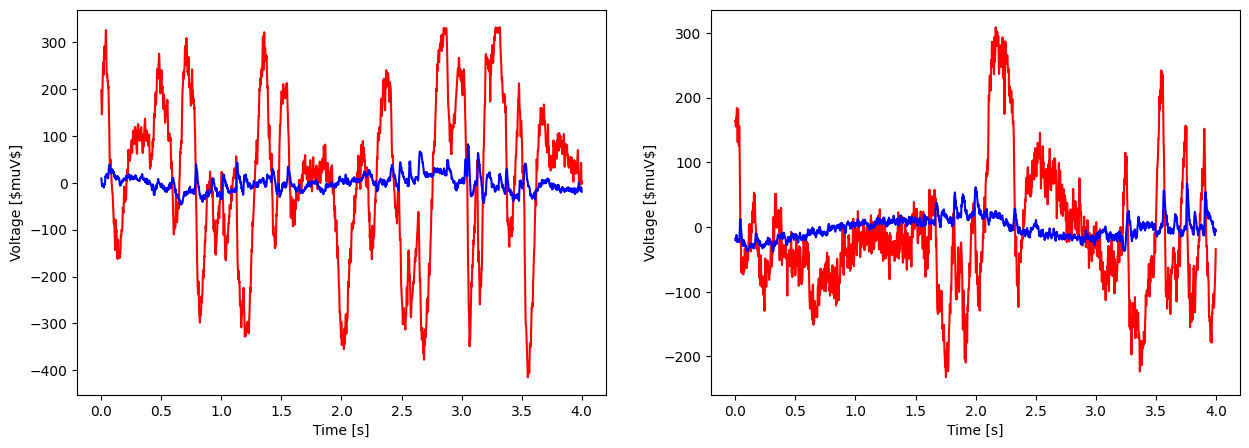

In [10]:
#Plot first trial of acc & lc hits; acc & lc f

fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(time, acc_hits[0], 'r')
ax[0].plot(time, lc_hits[0], 'b')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Voltage [\$muV$]')

ax[1].plot(time, acc_fa[0], 'r')
ax[1].plot(time, lc_fa[0],'b')
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('Voltage [\$muV$]')

* In the acc LFP, there seem to be 11 peaks in the dominant oscillation, meaning a frequency of 2.75 Hz
* In the lc LFP, there seem to be 24 peaks in the dominant oscillation, meaning a frequency of 6 Hz

The lc LFP has a higher frequency than the acc LFP. It appears there are some peaks in the lc correspond with the downtrough in the acc in many instances, which indicates there might be some coherence.



Text(0.5, 1.0, 'Coherence between two electrodes')

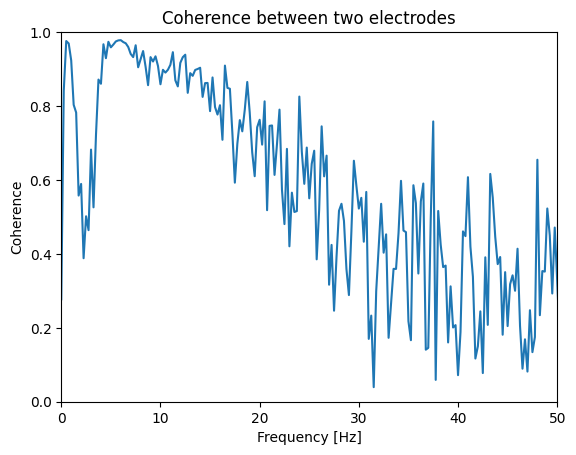

In [25]:
#Compute the coherence for the hits data sets

dt = time[1]-time[0]
N = acc_hits.shape[1]

# Compute the Fourier transforms
xf = np.array([np.fft.rfft(x - x.mean()) for x in acc_hits])  # ... for each trial in E1
yf = np.array([np.fft.rfft(y - y.mean()) for y in lc_hits])  # ... and each trial in E2

# Compute the spectra
T = time[-1]
scale = 2 * dt**2 / T
Sxx = scale * (xf * xf.conj()).mean(0)  # Spectrum of E1 trials
Syy = scale * (yf * yf.conj()).mean(0)  # ... and E2 trials
Sxy = scale * (xf * yf.conj()).mean(0)  # ... and the cross spectrum

# Compute the coherence.
cohr_hit = np.abs(Sxy) / (np.sqrt(Sxx) * np.sqrt(Syy))

f = np.fft.rfftfreq(N, dt)                     # Define a frequency axis.
plt.plot(f, cohr_hit.real)                      # Plot coherence vs frequency,
plt.xlim([0, 50])                           # ... in a chosen frequency range,
plt.ylim([0, 1])                            # ... with y-axis scaled,
plt.xlabel('Frequency [Hz]')                # ... and with axes labeled.
plt.ylabel('Coherence')
plt.title('Coherence between two electrodes')

There is very high coherence around the 1-2 Hz range, and then again in the 5-10 Hz range. After that, the coherence decreases significantly. There is also a steep drop in coherence between 2-5 Hz.

Text(0.5, 1.0, 'Coherence between two electrodes')

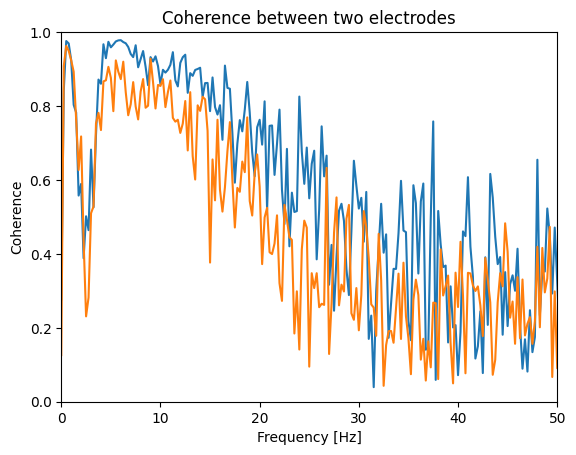

In [24]:
#Compute the coherence for the false alarm data sets, plot both

dt = time[1]-time[0]
N = acc_hits.shape[1]

# Compute the Fourier transforms
xf = np.array([np.fft.rfft(x - x.mean()) for x in acc_fa])  # ... for each trial in E1
yf = np.array([np.fft.rfft(y - y.mean()) for y in lc_fa])  # ... and each trial in E2

# Compute the spectra
T = time[-1]
scale = 2 * dt**2 / T
Sxx = scale * (xf * xf.conj()).mean(0)  # Spectrum of E1 trials
Syy = scale * (yf * yf.conj()).mean(0)  # ... and E2 trials
Sxy = scale * (xf * yf.conj()).mean(0)  # ... and the cross spectrum

# Compute the coherence.
cohr_fa = np.abs(Sxy) / (np.sqrt(Sxx) * np.sqrt(Syy))

f = np.fft.rfftfreq(N, dt)                     # Define a frequency axis.
plt.plot(f, cohr_hit.real)
plt.plot(f, cohr_fa.real)                      # Plot coherence vs frequency,
plt.xlim([0, 50])                           # ... in a chosen frequency range,
plt.ylim([0, 1])                            # ... with y-axis scaled,
plt.xlabel('Frequency [Hz]')                # ... and with axes labeled.
plt.ylabel('Coherence')
plt.title('Coherence between two electrodes')

The false alarm coherence peaks in very similar areas, with the largest peak around 2-3 Hz. Overall, the coherence is lower in the false alarms than in the hits. This means that there is more communication between the ACC and LC during a hit than during a false alarm.

